# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 5**

**Número do Grupo:** 9

**Alunos:**
1. Danilo Carneiro
2. Roger Rafael

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Manuseio e exploração de datasets utilizando a biblioteca `pandas`;
- Transformação de variáveis utilizando a biblioteca `scikit-learn`;
- Análise e tratamento de desbalanceamento de datasets.

---

Para os exercícios de **1** a **5**, utilizaremos o dataset **creditcard_sampled.csv**. A célula de código a seguir realizará o download deste dataset para o ambiente virtual do Google Colab.

> **Consulte o material complementar para a realização desta atividade!**
- UndersamplingOversampling-Exemplo.ipynb


In [115]:
# Download do dataset para o ambiente virtual.
!wget -O creditcard_sampled.csv "https://drive.google.com/uc?export=download&id=1bLUhD8rgrPtSo5I49wI7LzxDkVzzowJw"

--2023-10-05 19:28:32--  https://drive.google.com/uc?export=download&id=1bLUhD8rgrPtSo5I49wI7LzxDkVzzowJw
Resolving drive.google.com (drive.google.com)... 142.250.157.113, 142.250.157.139, 142.250.157.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.157.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9vrcpbkc7ohhv0obd6en1e7130uuuagd/1696534050000/17263126637575785733/*/1bLUhD8rgrPtSo5I49wI7LzxDkVzzowJw?e=download&uuid=d8161727-ea32-4bce-8688-2b5f0f263044 [following]
--2023-10-05 19:28:33--  https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9vrcpbkc7ohhv0obd6en1e7130uuuagd/1696534050000/17263126637575785733/*/1bLUhD8rgrPtSo5I49wI7LzxDkVzzowJw?e=download&uuid=d8161727-ea32-4bce-8688-2b5f0f263044
Resolving doc-0s-a0-docs.googleusercontent.com (doc-0s-a0-docs.googleusercontent.com)... 173.194.174.132, 

## *Dataset* **creditcard_sampled.csv**

---
### Questão 01.

Carregue o *dataset* **creditcard_sampled.csv** (`pandas.read_csv`).

- Existem valores faltantes neste *dataset*?

Mostre a distribuição das classes:
-   Via histograma
-   Exibindo o número de ocorrências de cada classe



Missing Values:
Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

Número de ocorrência de cada classe:
0    10000
1      492
Name: Class, dtype: int64




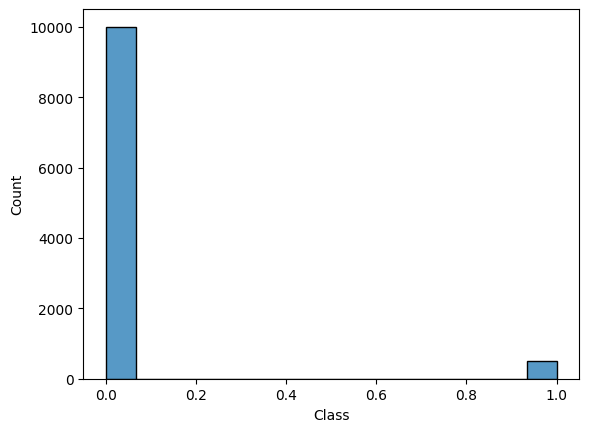

In [116]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('creditcard_sampled.csv')

print('Missing Values:')
print(pd.isna(df).sum())

sns.histplot(data=df['Class'])

print("\nNúmero de ocorrência de cada classe:")
print(df['Class'].value_counts())
print('\n')

---

### Questão 02.

Separe o conjunto de dados em variáveis de entrada e variável alvo.

In [117]:
y = df.drop('Class', axis=1)
x = df.loc[:, ['Class']]
print(x)



       Class
0          1
1          1
2          1
3          1
4          1
...      ...
10487      0
10488      0
10489      0
10490      0
10491      0

[10492 rows x 1 columns]


---

### Questão 03.

Crie uma função que aplique a técnica de subamostragem aleatória nesse conjunto de dados.
- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função e deve retornar um novo conjunto onde todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes

In [118]:
# Nomalização dos dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_normalizada = scaler.fit_transform(y)
data_normalizada = pd.DataFrame(data_normalizada)

#Criando função

def undersample(inputs, targets):
    #concatena variaveis de entrada e alvo em um dataframe unico
    data_normalizada = pd.concat([inputs, targets], axis=1)

    #identifica os valores da classe e o valor do atributo classe com menor representatividade
    distClass = data_normalizada[targets.columns[0]].value_counts()
    numMenorRepresentatividade = distClass.min()

    #cria novo dataframe vazio para armazenar a amistragem a ser realizada
    amostra = pd.DataFrame()

    for classe in distClass.index:

        dfClasse = data_normalizada.loc[data_normalizada[targets.columns[0]] == classe]

        amostragem = dfClasse.sample(n=numMenorRepresentatividade, random_state=42, replace=False)
        amostra = pd.concat([amostra, amostragem])

    undersampled_data = amostra.drop(targets.columns[0], axis=1)
    undersampled_targets = amostra.loc[:, targets.columns[0]]
    return undersampled_data, undersampled_targets

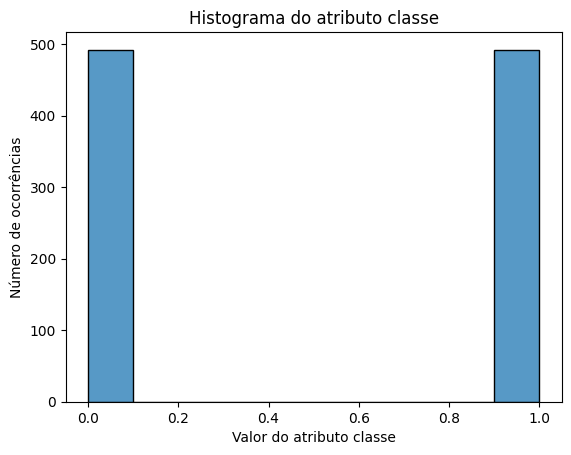

            0         1         2         3         4         5         6   \
6744  0.533651  0.559582  0.917941  0.577186  0.905652  0.242139  0.599750   
5176  0.915892  0.924545  0.991295  0.567089  0.812114  0.312811  0.598921   
2223  0.039740  0.114752  0.904128  0.569498  0.964511  0.177704  0.571223   
5234  0.759838  0.812925  0.929239  0.549483  0.905128  0.112825  0.567107   
5013  0.168097  0.251109  0.953244  0.523523  0.896573  0.206216  0.537484   
...        ...       ...       ...       ...       ...       ...       ...   
106   0.145134  0.235131  0.792562  0.562698  0.739649  0.694835  0.715375   
270   0.500427  0.490587  0.884127  0.547092  0.917593  0.307863  0.570327   
348   0.543145  0.594137  0.759006  0.675487  0.607272  0.781680  0.462435   
435   0.840898  0.868900  0.862268  0.606339  0.787932  0.291908  0.573149   
102   0.116620  0.214898  0.686999  0.460001  0.800190  0.545813  0.637054   

            7         8         9   ...        21        22    

In [119]:
undersampled_data, undersampled_targets = undersample(data_normalizada, x)

sns.histplot(data=undersampled_targets, bins=10)
plt.xlabel('Valor do atributo classe')
plt.ylabel('Número de ocorrências')
plt.title('Histograma do atributo classe')
plt.show()

print(undersampled_data, undersampled_targets)

---

### Questão 04.

Crie uma função que aplique a técnica de superamostragem aleatória nesse conjunto de dados.

- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função deve receber como entrada a base original e retornar um novo conjunto de dados onde todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes

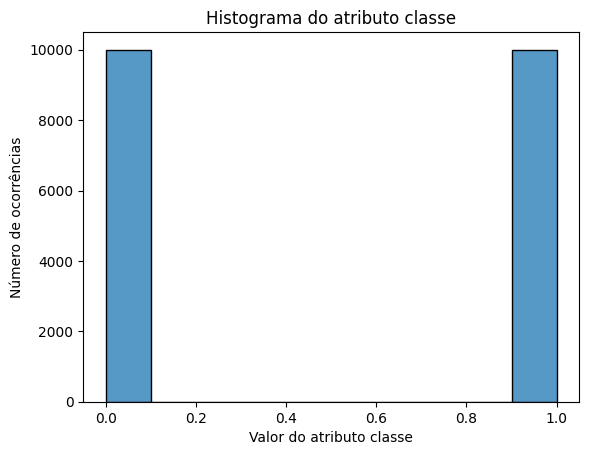

Número de ocorrência de cada classe:
1    10000
0    10000
Name: Class, dtype: int64


In [120]:
y = (y-y.min())/(y.max()-y.min())
def oversample(y,x):

  df = pd.concat([y,x], axis=1)
  df_1 = df[df.Class == 1]


  amostra_1 = df_1.sample(n=10000,replace=True)


  df_0 = df[df.Class == 0]
  oversample = pd.concat([amostra_1,df_0])

  sns.histplot(data=oversample['Class'], bins=10)
  plt.xlabel('Valor do atributo classe')
  plt.ylabel('Número de ocorrências')
  plt.title('Histograma do atributo classe')
  plt.show()

  print("Número de ocorrência de cada classe:")
  print(oversample['Class'].value_counts())
  return

oversample(y,x)

---

### Questão 05.

Crie uma função que utilize técnicas de subamostragem e superamostragem nesse conjunto de dados para balancear o número de exemplos de cada classe.

- Sua função deve receber como entrada a base normalizada e as classes.
- Sua função deve receber como entrada a base original e retornar uma nova base onde todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes

In [136]:
def undersample(inputs, targets):
    #concatena variaveis de entrada e alvo em um dataframe unico
    data_normalizada = pd.concat([inputs, targets], axis=1)

    #identifica os valores da classe e o valor do atributo classe com menor representatividade
    distClass = data_normalizada[targets.columns[0]].value_counts()


    #cria novo dataframe vazio para armazenar a amistragem a ser realizada
    amostra = pd.DataFrame()

    for classe in distClass.index:

        dfClasse = data_normalizada.loc[data_normalizada[targets.columns[0]] == classe]

        amostragem = dfClasse.sample(n=len(df)//3, random_state=42, replace=True)
        amostra = pd.concat([amostra, amostragem])

    undersampled_data = amostra.drop(targets.columns[0], axis=1)
    undersampled_targets = amostra.loc[:, targets.columns[0]]
    return undersampled_data, undersampled_targets

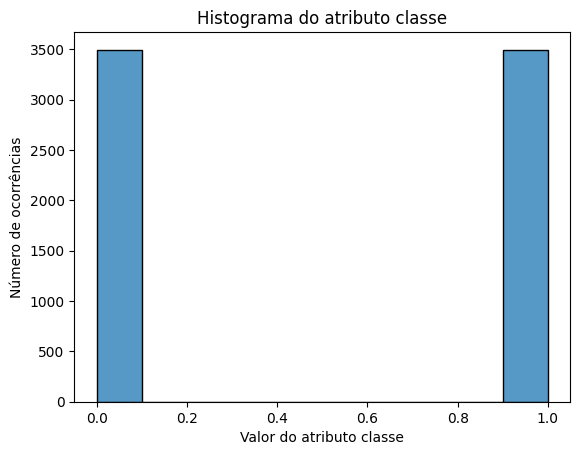

In [137]:
undersampled_data, undersampled_targets = undersample(data_normalizada, x)

sns.histplot(data=undersampled_targets, bins=10)
plt.xlabel('Valor do atributo classe')
plt.ylabel('Número de ocorrências')
plt.title('Histograma do atributo classe')
plt.show()